##### Polynomial Regression ####
Polynomial regression is a form of regression analysis in which the relationship between the independent variable `x` and the <i>dependent variable</i> `y` is modelled as an `nth degree` polynomial in x.
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bc6e10cc75097fa66e7e02d6a75491d14a0c4aba" width="50%" ></img>

In [1]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 

In [2]:
#load features
features = pd.read_csv("features.csv")
features.head()
features.sort_values(by="Rented Bikes", ascending=True, inplace=True)

In [3]:
#transorm non-numerical labels to numerical labels
le = LabelEncoder()
features.loc[:,'Holiday'] = le.fit_transform(features['Holiday'])
cleanup_nums = {"Month":   {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12},
               "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4},
               "Weekday": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                                  "Friday": 5, "Saturday": 6, "Sunday":7 },
               "Daily Weather": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7},
               "Daily Weather (Past)": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5,"fog": 6, "snow": 7} }
features.replace(cleanup_nums, inplace=True)
features.head()

,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
1072,12,4,2,1,5,5,0.87,0.87,4.06,8.49,36.545,42.290,12,40
1070,12,4,7,0,3,3,0.89,0.91,6.24,4.58,48.235,45.735,16,58
1154,3,1,7,0,2,2,0.81,0.86,7.64,7.75,25.590,24.245,17,308
712,12,4,6,0,1,2,0.82,0.90,4.96,4.49,46.735,45.475,17,80
1166,3,1,5,1,5,5,0.91,0.87,2.60,3.25,40.125,42.065,18,27


In [4]:
#target variable
y = features['Rented Bikes (Future)'].tolist()
y

[40,
 58,
 308,
 80,
 27,
 35,
 64,
 34,
 20,
 29,
 44,
 46,
 31,
 27,
 29,
 30,
 237,
 331,
 307,
 41,
 72,
 46,
 252,
 236,
 46,
 283,
 353,
 306,
 31,
 17,
 29,
 354,
 362,
 296,
 358,
 28,
 283,
 31,
 43,
 315,
 43,
 46,
 221,
 60,
 365,
 16,
 63,
 62,
 27,
 29,
 30,
 42,
 55,
 35,
 55,
 54,
 320,
 317,
 41,
 314,
 58,
 58,
 49,
 26,
 309,
 71,
 360,
 302,
 46,
 277,
 333,
 373,
 65,
 41,
 301,
 290,
 167,
 39,
 327,
 348,
 302,
 44,
 26,
 295,
 60,
 224,
 226,
 277,
 67,
 358,
 321,
 65,
 575,
 51,
 302,
 116,
 57,
 57,
 38,
 37,
 33,
 55,
 298,
 40,
 177,
 279,
 293,
 360,
 370,
 367,
 336,
 205,
 252,
 51,
 38,
 84,
 73,
 50,
 43,
 24,
 46,
 43,
 310,
 64,
 44,
 303,
 283,
 279,
 58,
 298,
 40,
 249,
 295,
 344,
 330,
 52,
 24,
 60,
 314,
 52,
 51,
 38,
 316,
 39,
 40,
 62,
 36,
 46,
 369,
 71,
 63,
 69,
 323,
 350,
 296,
 342,
 315,
 260,
 269,
 62,
 46,
 78,
 406,
 321,
 36,
 331,
 57,
 401,
 111,
 362,
 42,
 12,
 63,
 55,
 313,
 247,
 66,
 359,
 59,
 90,
 348,
 53,
 43,
 59,


In [5]:
#Feature Matrix with past and today data
X=features.loc[:,['Month','Season','Weekday','Rented Bikes','Daily Weather','Daily Weather (Past)','Humidity', 'Humidity (Past)','Windspeed','Windspeed (Past)','Apparent Temperature (Avg)','Apparent Temperature (Avg) (Past)']]
X.head()

,Month,Season,Weekday,Rented Bikes,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past)
1072,12,4,2,12,5,5,0.87,0.87,4.06,8.49,36.545,42.290
1070,12,4,7,16,3,3,0.89,0.91,6.24,4.58,48.235,45.735
1154,3,1,7,17,2,2,0.81,0.86,7.64,7.75,25.590,24.245
712,12,4,6,17,1,2,0.82,0.90,4.96,4.49,46.735,45.475
1166,3,1,5,18,5,5,0.91,0.87,2.60,3.25,40.125,42.065


In [6]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

/opt/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,Month,Season,Weekday,Rented Bikes,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past)
1464,1,4,2,309,2,1,0.82,0.66,3.80,10.18,30.835,28.715
618,9,3,3,407,2,2,0.79,0.86,1.44,1.01,63.615,60.735
553,7,2,1,365,2,2,0.79,0.79,5.19,5.05,61.850,66.150
687,11,3,2,372,1,1,0.80,0.70,0.78,3.01,34.500,36.585
731,1,4,4,328,5,2,0.84,0.76,2.69,4.49,36.430,45.355
1243,6,2,5,324,1,4,0.58,0.68,6.31,10.89,64.315,63.195
218,8,2,2,365,2,2,0.75,0.80,0.12,3.07,64.590,65.055
769,2,4,7,67,2,2,0.85,0.86,2.57,2.27,51.390,46.755
104,4,1,7,41,2,2,0.70,0.66,2.82,4.82,43.840,48.650
606,9,3,5,367,2,2,0.79,0.71,4.78,2.68,67.970,66.280


<Figure size 432x288 with 0 Axes>

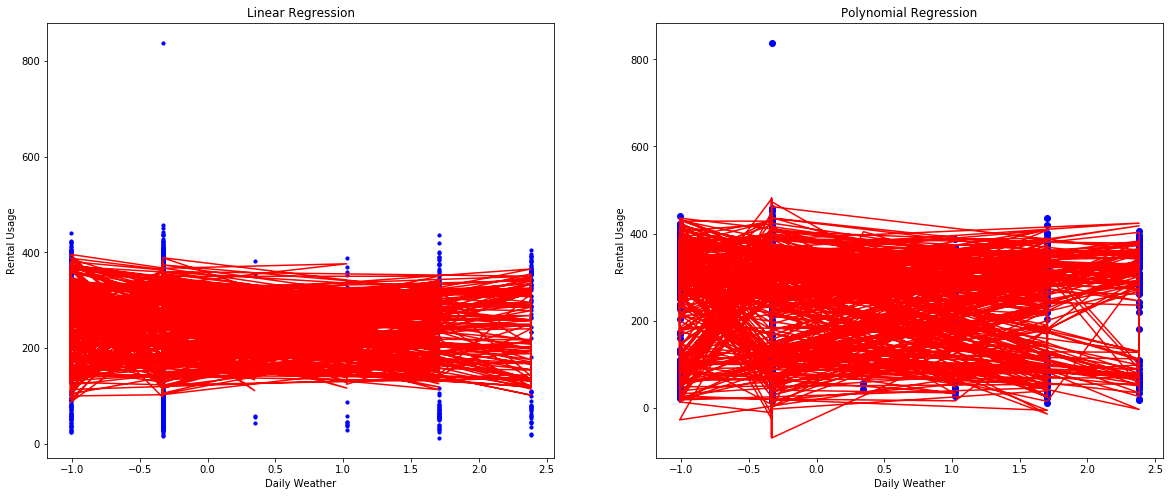

47.45649947282263
0.8702317112194976


In [7]:
#Normal regression
lin = LinearRegression()
lin.fit(X_train_scaled,y_train)
lin_predict = lin.predict(X_train_scaled)

##nth degree of polynomial in x
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train_scaled)
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
poly_predict = lin2.predict(X_poly)

plt.subplots_adjust(wspace=0.8,hspace=0.5)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(X_train_scaled[:,4], y_train, s=10, color="blue")
plt.plot(X_train_scaled[:,4], lin_predict, color = "red")
plt.title("Linear Regression")
plt.xlabel("Daily Weather")
plt.ylabel("Rental Usage")

plt.subplot(122)

plt.scatter(X_train_scaled[:,4], y_train, color = 'blue') 
plt.plot(X_train_scaled[:,4], poly_predict, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Daily Weather') 
plt.ylabel('Rental Usage') 
  
plt.show() 

rmse = np.sqrt(mean_squared_error(y_train, poly_predict))
r2 = r2_score(y_train,poly_predict)
print(rmse)
print(r2)


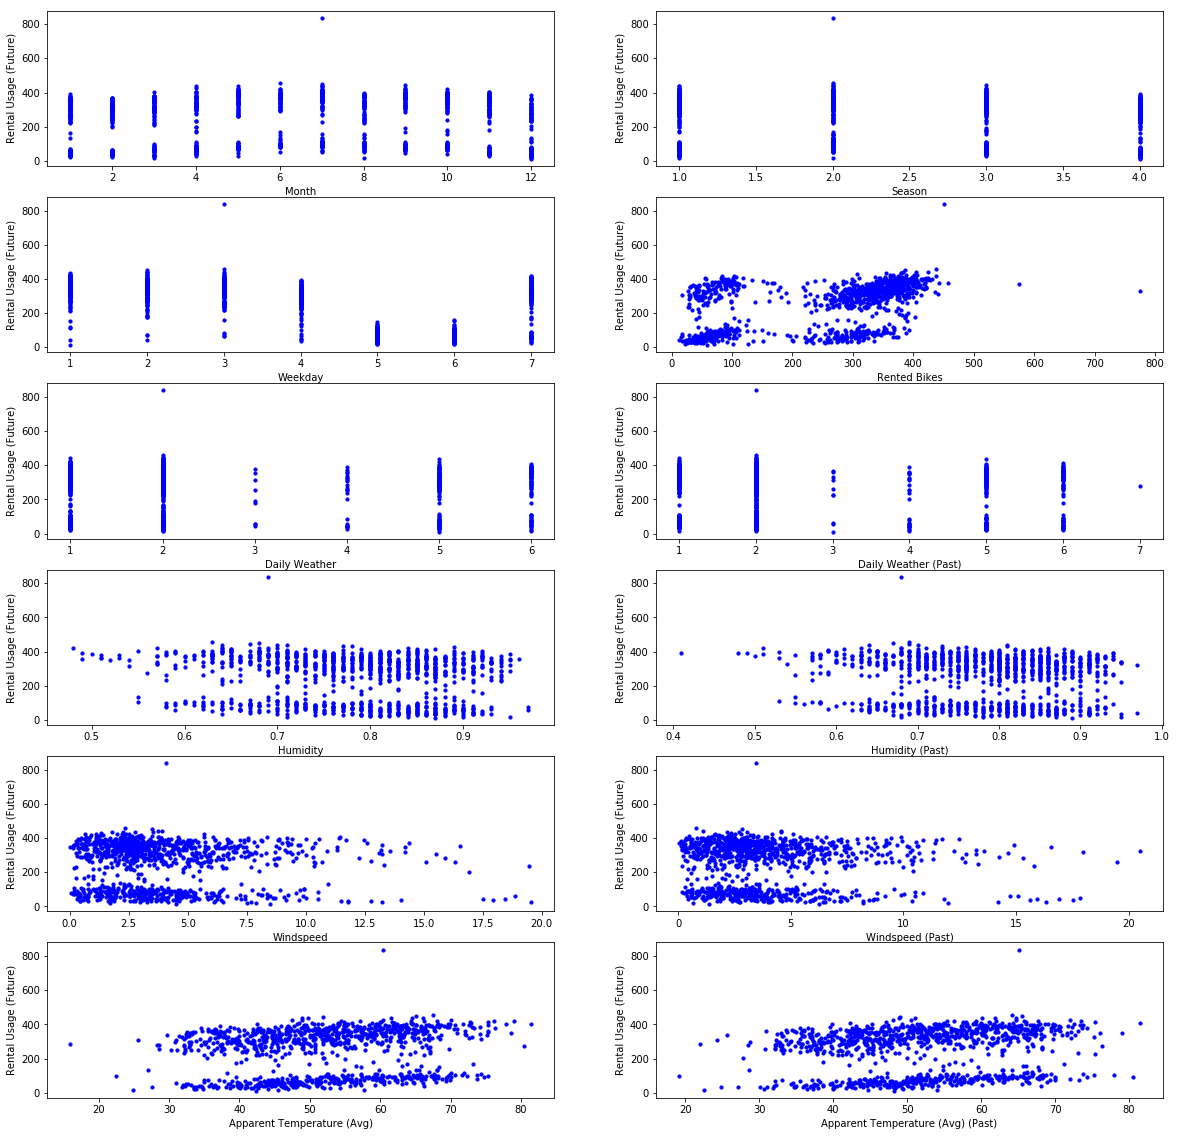

In [8]:
length = len(X_train.values[0])
width = 2
height = length / width + length % width

plt.figure(figsize=(20,20))

for i in range(length):
    plt.subplot(height, width, i + 1)
    plt.scatter(X_train.values[:,i], y_train, s=10, color="blue")
    #plt.title(features.columns[i])
    plt.xlabel(X_train.columns[i])
    plt.ylabel('Rental Usage (Future)')

plt.show() 